In [1]:
import torch as t
from torch import nn

In [17]:
class Linear(nn.Module):
    def __init__(self,in_feature,out_feature):
        super(Linear,self).__init__()
        self.w = nn.Parameter(t.randn(in_feature,out_feature))
        self.b = nn.Parameter(t.randn(out_feature))
    
    def forward(self,x):
        x = x.mm(self.w)
        return x+self.b

In [18]:
layer = Linear(4,3)
input = t.randn(2,4)
output = layer(input)
output

tensor([[-4.5520, -0.8408,  0.0920],
        [-0.8392, -2.1970, -0.3329]], grad_fn=<AddBackward0>)

In [19]:
for name,parameter in layer.named_parameters():
    print(name,parameter)

w Parameter containing:
tensor([[-0.9911, -0.4938,  0.6507],
        [-0.9292, -2.2638, -0.8611],
        [-1.7817,  0.2226, -0.3913],
        [-1.1380,  1.2109,  0.8103]], requires_grad=True)
b Parameter containing:
tensor([ 0.7877, -0.2868,  0.3864], requires_grad=True)


In [20]:
class Perceptron(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        nn.Module.__init__(self)
        self.layer1 = Linear(in_features,hidden_features)
        self.layer2 = Linear(hidden_features,out_features)
    
    def forward(self,x):
        x = self.layer1(x)
        x = t.sigmoid(x)
        return self.layer2(x)

In [21]:
perceptron = Perceptron(3,4,1)
for name,para in perceptron.named_parameters():
    print(name,para)

layer1.w Parameter containing:
tensor([[-0.3707, -0.7060, -1.5253, -0.3329],
        [ 0.9578,  0.1075, -0.3825, -1.8294],
        [ 1.0888, -1.2597, -0.5326, -0.3553]], requires_grad=True)
layer1.b Parameter containing:
tensor([-0.4837,  1.0180,  0.1996, -0.6911], requires_grad=True)
layer2.w Parameter containing:
tensor([[-0.4341],
        [-1.7196],
        [ 0.7951],
        [ 1.2039]], requires_grad=True)
layer2.b Parameter containing:
tensor([-1.0236], requires_grad=True)


In [22]:
from PIL import Image

In [23]:
from torchvision.transforms import ToTensor, ToPILImage

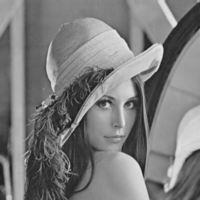

In [24]:
to_tensor = ToTensor()
to_pil = ToPILImage()
lena = Image.open('下载.png')
lena

In [31]:
input = to_tensor(lena).unsqueeze(0)

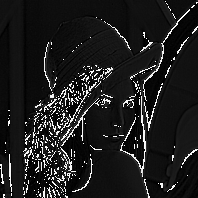

In [32]:
kernel = t.ones(3,3)/-9
kernel[1][1] = 1
conv = nn.Conv2d(1,1,(3,3),1,bias=False)
conv.weight.data = kernel.view(1,1,3,3)
out=conv(input)
to_pil(out.data.squeeze(0))

In [33]:
pool = nn.AvgPool2d(2,2)
list(pool.parameters())

[]

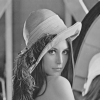

In [35]:
out = pool(input)
to_pil(out.data.squeeze(0))

In [37]:
input = t.randn(2,3)
linear = nn.Linear(3,4)
h = linear(input)
h

tensor([[-0.9070,  0.4393,  0.7213, -0.9608],
        [-0.6908,  0.6854,  1.2240, -0.2746]], grad_fn=<AddmmBackward>)

In [40]:
bn = nn.BatchNorm1d(4)

In [41]:
bn.weight.data = t.ones(4) * 4

In [42]:
bn.bias.data = t.zeros(4)
bn_out = bn(h)

In [43]:
bn_out.mean(0), bn_out.var(0,unbiased=False)

(tensor([-1.0729e-06, -1.0729e-06, -4.7684e-07, -2.3842e-07],
        grad_fn=<MeanBackward0>),
 tensor([15.9863, 15.9894, 15.9975, 15.9986], grad_fn=<VarBackward1>))

In [45]:
dropout = nn.Dropout(0.5)
o = dropout(bn_out)
o

tensor([[-0.0000, -0.0000, -7.9994, -7.9997],
        [ 0.0000,  7.9974,  0.0000,  7.9997]], grad_fn=<MulBackward0>)

In [46]:
import torch
from torch import nn
from torch.nn import init
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np

In [47]:
N_SAMPLES = 2000
BATCH_SIZE = 64
EPOCH = 12
LR = 0.03
N_HIDDEN = 8
ACTIVATION = torch.tanh
B_INIT = -0.2

In [48]:
x = np.linspace(-7,10,N_SAMPLES)[:,np.newaxis]

In [49]:
x

array([[-7.        ],
       [-6.99149575],
       [-6.9829915 ],
       ...,
       [ 9.9829915 ],
       [ 9.99149575],
       [10.        ]])

In [50]:
noise = np.random.normal(0,2,x.shape)

In [51]:
noise

array([[ 2.44410175],
       [-0.88210607],
       [ 1.17831926],
       ...,
       [ 1.78165341],
       [ 0.3030517 ],
       [-2.20222969]])

In [52]:
y = np.square(x) - 5 + noise

In [53]:
y

array([[46.44410175],
       [42.99890672],
       [44.94048949],
       ...,
       [96.44177261],
       [95.13303897],
       [92.79777031]])

In [54]:
test_x = np.linspace(-7,10,200)[:,np.newaxis]

In [55]:
test_x

array([[-7.00000000e+00],
       [-6.91457286e+00],
       [-6.82914573e+00],
       [-6.74371859e+00],
       [-6.65829146e+00],
       [-6.57286432e+00],
       [-6.48743719e+00],
       [-6.40201005e+00],
       [-6.31658291e+00],
       [-6.23115578e+00],
       [-6.14572864e+00],
       [-6.06030151e+00],
       [-5.97487437e+00],
       [-5.88944724e+00],
       [-5.80402010e+00],
       [-5.71859296e+00],
       [-5.63316583e+00],
       [-5.54773869e+00],
       [-5.46231156e+00],
       [-5.37688442e+00],
       [-5.29145729e+00],
       [-5.20603015e+00],
       [-5.12060302e+00],
       [-5.03517588e+00],
       [-4.94974874e+00],
       [-4.86432161e+00],
       [-4.77889447e+00],
       [-4.69346734e+00],
       [-4.60804020e+00],
       [-4.52261307e+00],
       [-4.43718593e+00],
       [-4.35175879e+00],
       [-4.26633166e+00],
       [-4.18090452e+00],
       [-4.09547739e+00],
       [-4.01005025e+00],
       [-3.92462312e+00],
       [-3.83919598e+00],
       [-3.7

In [56]:
noise = np.random.normal(0,2,test_x.shape)

In [57]:
test_y = np.square(test_x) - 5 + noise

In [58]:
train_x, train_y = torch.from_numpy(x).float() , torch.from_numpy(y).float()

In [59]:
test_x,test_y = torch.from_numpy(test_x).float() , torch.from_numpy(test_y).float()

In [60]:
train_dataset = Data.TensorDataset(train_x,train_y)

In [61]:
train_loader = Data.DataLoader(dataset=train_dataset, batch_size= BATCH_SIZE, shuffle= True, num_workers=2.)

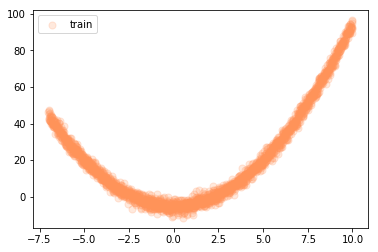

In [64]:
plt.scatter(train_x.numpy(), train_y.numpy(), c='#FF9359', s=50, alpha=0.2, label='train')
plt.legend(loc='upper left')


In [65]:
class Net(nn.Module):
    def __init__(self,batch_normalization=False):
        super(Net,self).__init__()
        self.do_bn = batch_normalization
        self.fcs = []
        self.bns = []
        self.bn_input = nn.BatchNorm1d(1, momentum=0.5)
        
        for i in range(N_HIDDEN):
            input_size = 1 if i == 0 else 10
            fc = nn.Linear(input_size,10)
            setattr(self,'fc%i' %i, fc)
            self._set_init(fc)
            self.fcs.append(fc)
            if self.do_bn:
                bn = nn.BatchNorm1d(10, momentum=0.5)
                setattr(self,'bn%i' %i, bn)
                self.bns.append(bn)
        
        self.predict = nn.Linear(10,1)
        self._set_init(self.predict)
        
    
    def _set_init(self,layer):
        init.normal_(layer.weight, mean = 0., std=.1)
        init.constant_(layer.bias, B_INIT)
    
    def forward(self,x):
        pre_activation = [x]
        if self.do_bn: x = self.bn_input(x)
        layer_input = [x]
        for i in range(N_HIDDEN):
            x = self.fcs[i](x)
            pre_activation.append(x)
            if self.do_bn: x = self.bns[i](x)
            x = ACTIVATION(x)
            layer_input.append(x)
        
        out = self.predict(x)
        return out, layer_input, pre_activation
        

In [66]:
nets = [Net(batch_normalization=False),Net(batch_normalization=True)]

In [67]:
opts = [torch.optim.Adam(net.parameters(),lr=LR) for net in nets]

In [68]:
loss_func = torch.nn.MSELoss()

In [69]:
def plot_histogram(l_in, l_in_bn, pre_ac, pre_ac_bn):
    for i, (ax_pa, ax_pa_bn, ax, ax_bn) in enumerate(zip(axs[0, :], axs[1, :], axs[2, :], axs[3, :])):
        [a.clear() for a in [ax_pa, ax_pa_bn, ax, ax_bn]]
        if i == 0:
            p_range = (-7, 10);the_range = (-7, 10)
        else:
            p_range = (-4, 4);the_range = (-1, 1)
        ax_pa.set_title('L' + str(i))
        ax_pa.hist(pre_ac[i].data.numpy().ravel(), bins=10, range=p_range, color='#FF9359', alpha=0.5);ax_pa_bn.hist(pre_ac_bn[i].data.numpy().ravel(), bins=10, range=p_range, color='#74BCFF', alpha=0.5)
        ax.hist(l_in[i].data.numpy().ravel(), bins=10, range=the_range, color='#FF9359');ax_bn.hist(l_in_bn[i].data.numpy().ravel(), bins=10, range=the_range, color='#74BCFF')
        for a in [ax_pa, ax, ax_pa_bn, ax_bn]: a.set_yticks(());a.set_xticks(())
        ax_pa_bn.set_xticks(p_range);ax_bn.set_xticks(the_range)
        axs[0, 0].set_ylabel('PreAct');axs[1, 0].set_ylabel('BN PreAct');axs[2, 0].set_ylabel('Act');axs[3, 0].set_ylabel('BN Act')
    plt.pause(0.01)


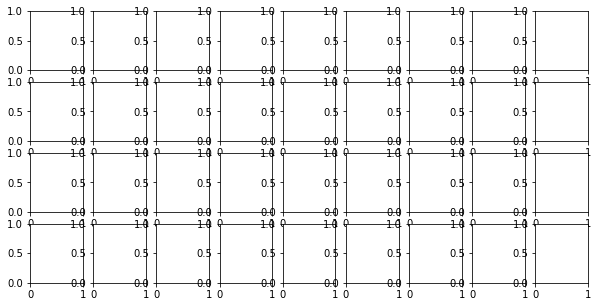

Epoch:  0


TypeError: 'float' object cannot be interpreted as an integer

In [71]:
m = nn.BatchNorm2d(2, affine=True)

In [72]:
input = torch.randn(1,2,3,4)

In [73]:
input

tensor([[[[-1.0615,  0.5423,  0.8422, -0.1300],
          [ 0.3445, -1.1645, -0.0253, -1.4475],
          [-1.7602, -1.8506, -0.0903,  0.2446]],

         [[ 0.4765, -1.1846, -0.3937,  0.3847],
          [-0.6919,  0.9499, -0.5053,  1.9954],
          [ 0.1909,  0.7312, -0.1480,  0.1561]]]])

In [74]:
output = m(input)

In [75]:
output

tensor([[[[-0.3108,  0.5222,  0.6779,  0.1730],
          [ 0.4194, -0.3643,  0.2274, -0.5113],
          [-0.6738, -0.7207,  0.1936,  0.3675]],

         [[ 0.1908, -0.8214, -0.3395,  0.1348],
          [-0.5212,  0.4792, -0.4075,  1.1163],
          [ 0.0167,  0.3460, -0.1898, -0.0044]]]],
       grad_fn=<NativeBatchNormBackward>)

In [76]:
m = nn.BatchNorm2d(3) #bn设置的参数实际上是channel的参数

In [77]:
input = torch.randn(4,3,2,2)

In [78]:
output = m(input)

In [79]:
input

tensor([[[[ 0.3212,  0.0658],
          [-0.9328, -0.9203]],

         [[ 0.7601, -0.2772],
          [-0.7432, -1.9688]],

         [[ 0.9391,  0.4498],
          [ 0.1518, -1.8697]]],


        [[[-0.1707,  0.9788],
          [-0.0993,  0.2458]],

         [[ 0.4382, -1.6871],
          [-2.1678,  0.0438]],

         [[-1.4075, -0.1256],
          [ 0.8799,  0.6693]]],


        [[[ 0.0149,  0.1056],
          [-2.6250, -1.8646]],

         [[-0.2940, -1.8053],
          [ 0.8012,  0.7135]],

         [[ 0.3487,  0.7389],
          [ 1.1070,  0.6594]]],


        [[[-0.0166,  0.3104],
          [ 1.7439,  0.1475]],

         [[ 0.6494, -0.1271],
          [-1.5074,  0.7189]],

         [[-2.1025, -0.0189],
          [-0.4006, -0.3449]]]])

In [82]:
a = (input[0, 0, :, :]+input[1, 0, :, :]+input[2, 0, :, :]+input[3, 0, :, :]).sum()/16
b = (input[0, 1, :, :]+input[1, 1, :, :]+input[2, 1, :, :]+input[3, 1, :, :]).sum()/16
c = (input[0, 2, :, :]+input[1, 2, :, :]+input[2, 2, :, :]+input[3, 2, :, :]).sum()/16


In [83]:
print(a)

tensor(-0.1685)


In [84]:
print(b)

tensor(-0.4033)


In [85]:
print(c)

tensor(-0.0204)


In [86]:
print(m)

BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [87]:
print(out)

tensor([[[[0.6333, 0.6353, 0.6245,  ..., 0.4618, 0.5480, 0.6186],
          [0.6196, 0.6216, 0.6137,  ..., 0.4863, 0.4176, 0.2775],
          [0.6167, 0.6147, 0.6147,  ..., 0.3912, 0.2147, 0.1873],
          ...,
          [0.2206, 0.2510, 0.3343,  ..., 0.2324, 0.2167, 0.2059],
          [0.2039, 0.2167, 0.2971,  ..., 0.2157, 0.2304, 0.2931],
          [0.1961, 0.2069, 0.2578,  ..., 0.2186, 0.3069, 0.3882]]]])


In [88]:
m.running_mean.data[0]

tensor(-0.0168)

In [89]:
m.running_mean.data[1]

tensor(-0.0403)

In [90]:
m.running_mean.data[2]

tensor(-0.0020)